# Modelling

In [32]:
import sys
import os
sys.path.append(os.path.abspath("../src"))
import util

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, StratifiedKFold, RandomizedSearchCV
from sklearn.metrics import confusion_matrix, classification_report

## 0. Load Config
---

In [15]:
config = util.load_config()

## 1. Load Data
---

In [16]:
# Load the train data
path_final = config['path_set_final']

# Load the test data
path_y_train = config['path_train_set']
path_test = config['path_test_set']

X_train = util.pickle_load(f"../{path_final[0]}")
X_test = util.pickle_load(f"../{path_final[1]}")
y_train = util.pickle_load(f"../{path_y_train[1]}")
y_test = util.pickle_load(f"../{path_test[1]}")

In [17]:
X_test.shape

(4000, 32)

## 2. Baseline Model

In [18]:
baseline = RandomForestClassifier(random_state=42)
baseline.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [20]:
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cross_score = cross_val_score(baseline, X_train, y_train, cv=kf, scoring='accuracy')
cross_score

array([0.5      , 0.4921875, 0.51375  , 0.495    , 0.499375 ])

In [22]:
y_pred = baseline.predict(X_test)

In [23]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

      Benign       0.49      0.52      0.50      1994
   Malignant       0.49      0.47      0.48      2006

    accuracy                           0.49      4000
   macro avg       0.49      0.49      0.49      4000
weighted avg       0.49      0.49      0.49      4000



In [29]:
cm = confusion_matrix(y_test, y_pred)

Text(0.5, 1.0, 'Confusion Matrix')

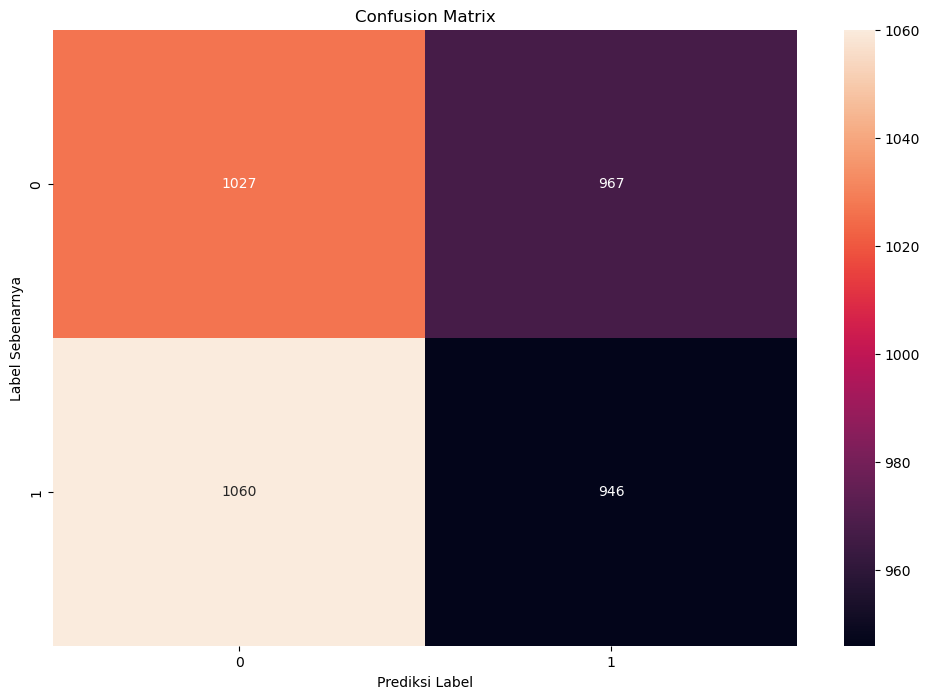

In [31]:
plt.figure(figsize=(12, 8))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Prediksi Label')
plt.ylabel('Label Sebenarnya')
plt.title('Confusion Matrix')

### 2.1 Hyperparameter Tunning

In [34]:
param_dist = {
    'n_estimators': [50, 100, 200],        # jumlah pohon
    'max_depth': [None, 5, 10, 20],        # kedalaman pohon
    'min_samples_split': [2, 5, 10],       # min sampel untuk split
    'min_samples_leaf': [1, 2, 4],         # min sampel di daun
    'max_features': ['auto', 'sqrt', 'log2'] # fitur yang dipakai untuk split
}

In [36]:
random_search = RandomizedSearchCV(
    estimator=baseline,
    param_distributions=param_dist,
    n_iter=20,
    cv=5,
    verbose=2,
    scoring='accuracy',
    n_jobs=-1
)

random_search.fit(X_train, y_train)

best_rf = random_search.best_estimator_
y_pred = best_rf.predict(X_test)
print("Classification Report:", classification_report(y_test, y_pred))

Fitting 5 folds for each of 20 candidates, totalling 100 fits


c:\Users\oktax\miniconda3\envs\mlenv\lib\site-packages\sklearn\model_selection\_validation.py:528: FitFailedWarning: 
40 fits failed out of a total of 100.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
4 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\oktax\miniconda3\envs\mlenv\lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\oktax\miniconda3\envs\mlenv\lib\site-packages\sklearn\base.py", line 1382, in wrapper
    estimator._validate_params()
  File "c:\Users\oktax\miniconda3\envs\mlenv\lib\site-packages\sklearn\base.py", line 436, in _validate_params
    validate_parameter_constraints(
  F

Classification Report:               precision    recall  f1-score   support

      Benign       0.49      0.52      0.50      1994
   Malignant       0.49      0.47      0.48      2006

    accuracy                           0.49      4000
   macro avg       0.49      0.49      0.49      4000
weighted avg       0.49      0.49      0.49      4000



In [37]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

      Benign       0.49      0.52      0.50      1994
   Malignant       0.49      0.47      0.48      2006

    accuracy                           0.49      4000
   macro avg       0.49      0.49      0.49      4000
weighted avg       0.49      0.49      0.49      4000

